In [1]:
import pandas as pd
data = pd.read_csv('/content/NSSO68 new.csv', low_memory=False)
data.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.100000e+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2.0,12.000000,154.18
1,2,4.100000e+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2.0,333.000000,484.95
2,3,4.100000e+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2.0,35.000000,214.84
3,4,4.100000e+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2.0,168.333333,302.30
4,5,4.100000e+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2.0,15.000000,148.00


In [13]:
import matplotlib.pyplot as plt

In [2]:
print(data.columns)

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)


In [3]:
data['non_vegetarian'] = (data[['eggsno_q', 'fishprawn_q', 'goatmeat_q', 'beef_q', 'pork_q', 'chicken_q', 'othrbirds_q']].sum(axis=1) > 0).astype(int)

In [7]:
X = data[['state', 'Sex', 'Age']]
y = data['non_vegetarian']

In [8]:
import statsmodels.api as sm
X = sm.add_constant(X)

In [10]:
probit_model = sm.Probit(y, X)
result = probit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.571625
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:         non_vegetarian   No. Observations:                 3928
Model:                         Probit   Df Residuals:                     3924
Method:                           MLE   Df Model:                            3
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                  0.1747
Time:                        14:35:28   Log-Likelihood:                -2245.3
converged:                       True   LL-Null:                       -2720.6
Covariance Type:            nonrobust   LLR p-value:                9.800e-206
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3321      0.466     28.605      0.000      12.419      14.246
state         -0.5827      0.

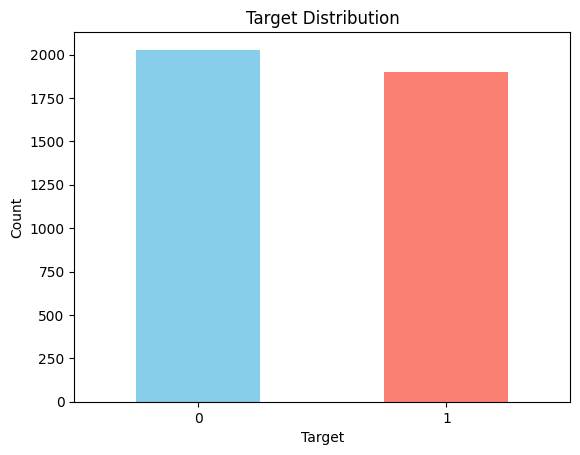

In [14]:
data['non_vegetarian'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0)
plt.show()